In [1]:
import post_process
import sklearn.preprocessing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
prefix = 'nsdi19/data/tmp'

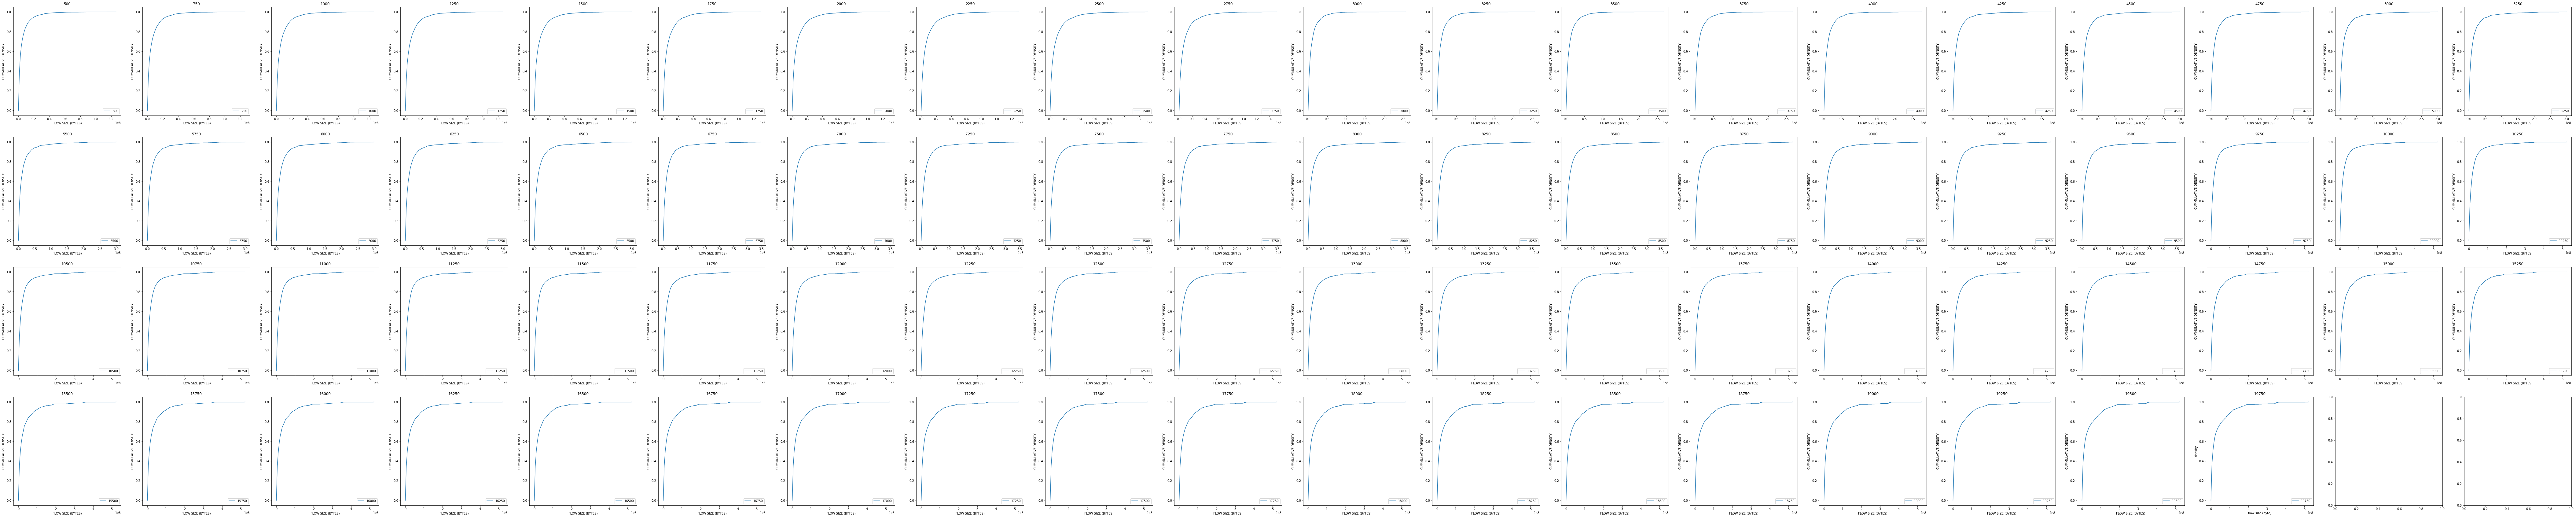

In [3]:
c = 1
nrows = 4
ncols = 20
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(150,30))
for time_delta in range(500, 20000, 250):   
    df = pd.read_csv(f'{prefix}/{time_delta}/train/flows.csv')
    flow_sizes = df['flow_size'].values
    flow_sizes_values, flow_sizes_base = np.histogram(flow_sizes, bins=100)
    flow_sizes_cum = np.cumsum(flow_sizes_values)
    flow_sizes_cum = sklearn.preprocessing.minmax_scale(flow_sizes_cum, feature_range=(0, 1))
    ax1 = plt.subplot(nrows, ncols, c)
    ax1.plot(flow_sizes_base[:-1], flow_sizes_cum, label=str(time_delta))
    ax1.set_title(str(time_delta))
    ax1.set_xlabel('FLOW SIZE (BYTES)')
    ax1.set_ylabel('CUMMULATIVE DENSITY')
    #ax1.set_xticks(np.arange(0, flow_sizes_base[-1], 50000))
    ax1.legend(loc="lower right")
    c += 1
plt.xlabel('flow size (byte)')
plt.ylabel('density')
plt.show()